## How to Develop a Character-Based Neural Language Model

A language model predicts the next word in a sequence based on the specific words that have come before it in the sequence. it is also possible to develop language models at the character level using neural networks. The benefit of character-based language models is their small vocabulary and flexibility in handling any words, punctuations and other document structures.

#### 1. Sing a Song of Sixpence

This is the data we'll use; A nursery rhyme. We will use all 4 verses of the rhyme to develop our character-based language model. It is quite short, so fitting a model will be fast, but not so short that we wont see anything interesting.

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.
When the pie was opened
The birds began to sing;
Wasn ' t that a dainty dish,
To set before the king.
The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.
The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.

Copy the text above and save in a file in your working directory called rhyme.txt

In [1]:
!pwd

/home/michael/Documents/Programming#/AMMI Basics/Natural Language Processing Keras


#### 2. Data Preparation

A language model must be trained on the text, and in the case of a character based LM, the input and output sequences must be characters. The number of characters used as inputs will also determine the number of characters that will need to be provided to the model in order to elicit the first predicted character.

After the first character has been generated, it can be appended to the input sequence and used as input for the model to generate the next character.

Longer sequences offer more context for the model to learn what character to output next, but take longer to train and impose more burden on seeding the model when generating text.

We will use an arbitrary length of 10 characters for this model. There is not a lot of text, and 10 characters is a few words. We can now transform the raw text into a form that our model can learn; specifically, input and output sequences of characters.

In [39]:
# Load document
def load_doc(filename):
    file = open(filename, 'rt')
    text = file.read()
    file.close()
    return text

In [40]:
# Get file and print
print(load_doc('Data/rhyme.txt'))

Sing a song of sixpence, 
A pocket full of rye. 
Four and twenty blackbirds, 
Baked in a pie. 
When the pie was opened 
The birds began to sing; 
Wasn't that a dainty dish, 
To set before the king. 
The king was in his counting house, 
Counting out his money; 
The queen was in the parlour, 
Eating bread and honey. 
The maid was in the garden, 
Hanging out the clothes, 
When down came a blackbird 
And pecked off her nose.



In [41]:
# Clean the text
tokens = load_doc('Data/rhyme.txt')
tokens = tokens.split()
raw_text = ' '.join(tokens)
print(raw_text)

Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose.


In [42]:
raw_text

"Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose."

In [43]:
# Create sequences: This creates the input-output sequences used to train the model.
# we will use 10 input characters to 1 output character. Making each sequence 11 characters long.
# We can create the sequences by enumerating the characters in the text, starting from the 11th character at index 10.
length = 10
sequences = list()
for i in range(length, len(raw_text)):
    # select sequence of tokens
    seq = raw_text[i-length:i+1]
    # store
    sequences.append(seq)
print('Total sequences: %d'% len(sequences))

Total sequences: 399


In [44]:
sequences

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

In [45]:
# sequence creation function
def create_sequence(raw_text, sequence_length=10):
    if sequence_length==None:
        return 'Please include a valid sequence number...'
    sequences = list()
    for i in range(sequence_length, len(raw_text)):
        # select sequence of tokens
        seq = raw_text[i-sequence_length:i+1]
        # store
        sequences.append(seq)
    print('Total sequences: %d'% len(sequences))
    return sequences

In [46]:
sequences = create_sequence(raw_text, 10)
sequences

Total sequences: 399


['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

In [47]:
# Save the sequences to file.
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    print('Done saving to %s...'%filename)  # %s means a string, %d means a decimal number.

In [48]:
# save
file_to_save = 'Data/char_sequences_'+str(len(sequences))+'.txt'
save_doc(sequences, file_to_save)

Done saving to Data/char_sequences_399.txt...


#### 3. Train Language Model

In [49]:
# Load our sequences data.
in_file = 'Data/char_sequences_399.txt'
raw_text = load_doc(in_file)
lines = raw_text.split('\n')

In [50]:
lines

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

#### Encode Sequences

The sequences of characters must be encoded as integers. This means that each unique character will be assigned a specific integer value and each sequence of characters will be encoded as a sequence of integers.

We can create the mapping given a sorted set of unique characters in the raw input data. The mapping is a dictionary of character values to integer values.

In [51]:
# sort the raw_text
chars = sorted(list(set(raw_text)))
print(chars)

['\n', ' ', "'", ',', '.', ';', 'A', 'B', 'C', 'E', 'F', 'H', 'S', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'w', 'x', 'y']


In [52]:
# create mapping for the text
mapping = dict((c, i) for i, c in enumerate(chars))
print(mapping)

{'\n': 0, ' ': 1, "'": 2, ',': 3, '.': 4, ';': 5, 'A': 6, 'B': 7, 'C': 8, 'E': 9, 'F': 10, 'H': 11, 'S': 12, 'T': 13, 'W': 14, 'a': 15, 'b': 16, 'c': 17, 'd': 18, 'e': 19, 'f': 20, 'g': 21, 'h': 22, 'i': 23, 'k': 24, 'l': 25, 'm': 26, 'n': 27, 'o': 28, 'p': 29, 'q': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'w': 35, 'x': 36, 'y': 37}


Process each sequence of characters one at a time and use the dictionary mapping to look up the integer value for each character.

In [53]:
# encode sequence value for characteers.
sequence = list()
for line in lines:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequence.append(encoded_seq)
sequence

[[12, 23, 27, 21, 1, 15, 1, 32, 28, 27, 21],
 [23, 27, 21, 1, 15, 1, 32, 28, 27, 21, 1],
 [27, 21, 1, 15, 1, 32, 28, 27, 21, 1, 28],
 [21, 1, 15, 1, 32, 28, 27, 21, 1, 28, 20],
 [1, 15, 1, 32, 28, 27, 21, 1, 28, 20, 1],
 [15, 1, 32, 28, 27, 21, 1, 28, 20, 1, 32],
 [1, 32, 28, 27, 21, 1, 28, 20, 1, 32, 23],
 [32, 28, 27, 21, 1, 28, 20, 1, 32, 23, 36],
 [28, 27, 21, 1, 28, 20, 1, 32, 23, 36, 29],
 [27, 21, 1, 28, 20, 1, 32, 23, 36, 29, 19],
 [21, 1, 28, 20, 1, 32, 23, 36, 29, 19, 27],
 [1, 28, 20, 1, 32, 23, 36, 29, 19, 27, 17],
 [28, 20, 1, 32, 23, 36, 29, 19, 27, 17, 19],
 [20, 1, 32, 23, 36, 29, 19, 27, 17, 19, 3],
 [1, 32, 23, 36, 29, 19, 27, 17, 19, 3, 1],
 [32, 23, 36, 29, 19, 27, 17, 19, 3, 1, 6],
 [23, 36, 29, 19, 27, 17, 19, 3, 1, 6, 1],
 [36, 29, 19, 27, 17, 19, 3, 1, 6, 1, 29],
 [29, 19, 27, 17, 19, 3, 1, 6, 1, 29, 28],
 [19, 27, 17, 19, 3, 1, 6, 1, 29, 28, 17],
 [27, 17, 19, 3, 1, 6, 1, 29, 28, 17, 24],
 [17, 19, 3, 1, 6, 1, 29, 28, 17, 24, 19],
 [19, 3, 1, 6, 1, 29, 28, 17, 

In [54]:
# Get the size of the vocabulary
vocab_size = len(mapping)
print('Vocabulary size: %d'% vocab_size)

Vocabulary size: 38


#### Split Inputs and Outputs

Now that the sequences have been integer encoded, we can seperate the columns into input and output sequences of characters, using array slices.

In [55]:
from numpy import array

In [56]:
sequences = array(sequence)
X = sequences[:,:-1]
y = sequences[:,-1]
X.shape, y.shape

((399, 10), (399,))

Now we need to one-hot-encode each character. That is, aech character becomes a vector as long as the vocabulary (38 elements) with a 1 marked for the specific charater.

This provides a more precise input representation for the network. It also provides a clear objective for the network to predict, where a probability distribution over characters can be output by the model and compared to the ideal case of all 0 values with a 1 for the actual next character.

In [48]:
from keras.utils import to_categorical

In [57]:
seq = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(seq)
y = to_categorical(y, num_classes=vocab_size)
X.shape, y.shape

((399, 10, 38), (399, 38))

In [58]:
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [36]:
# Imports for keras model
from keras.layers import Dense, Input, LSTM
from keras.models import Model, Sequential

In [59]:
# Fit the model
def model_seq(X):
    model = Sequential()
    model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(vocab_size, activation='softmax'))
    # model compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    return model

In [60]:
model = model_seq(X)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                34200     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2888      
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________


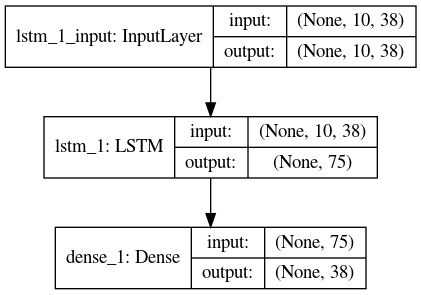

In [61]:
# plot the model
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [62]:
# Fit the model
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 3.6075 - accuracy: 0.1253
Epoch 2/100
 - 0s - loss: 3.4849 - accuracy: 0.1905
Epoch 3/100
 - 0s - loss: 3.1972 - accuracy: 0.1905
Epoch 4/100
 - 0s - loss: 3.0506 - accuracy: 0.1905
Epoch 5/100
 - 0s - loss: 3.0195 - accuracy: 0.1905
Epoch 6/100
 - 0s - loss: 2.9907 - accuracy: 0.1905
Epoch 7/100
 - 0s - loss: 2.9780 - accuracy: 0.1905
Epoch 8/100
 - 0s - loss: 2.9610 - accuracy: 0.1905
Epoch 9/100
 - 0s - loss: 2.9482 - accuracy: 0.1905
Epoch 10/100
 - 0s - loss: 2.9377 - accuracy: 0.1905
Epoch 11/100
 - 0s - loss: 2.9124 - accuracy: 0.1905
Epoch 12/100
 - 0s - loss: 2.8937 - accuracy: 0.1905
Epoch 13/100
 - 0s - loss: 2.8770 - accuracy: 0.1955
Epoch 14/100
 - 0s - loss: 2.8499 - accuracy: 0.1905
Epoch 15/100
 - 0s - loss: 2.8234 - accuracy: 0.1905
Epoch 16/100
 - 0s - loss: 2.7882 - accuracy: 0.2306
Epoch 17/100
 - 0s - loss: 2.7574 - accuracy: 0.1905
Epoch 18/100
 - 0s - loss: 2.7141 - accuracy: 0.2331
Epoch 19/100
 - 0s - loss: 2.6731 - accuracy: 0.2456
Ep

In [63]:
# Dump the model
from pickle import dump

In [64]:
# Save the model to file
model.save('Models/model_gen_text.h5')

In [65]:
# Save the mapping
dump(mapping, open('Weights/model_gen_text_mapping.pkl', 'wb'))

#### 4. Generate Text

We will now use the learned model to generate new sequences of text that have the same statistical properties.

##### Load the saved model

In [2]:
from keras.models import load_model
from pickle import load

In [66]:
# Load the model
model = load_model('Models/model_gen_text.h5')
# Load the mapping
mapping = load(open('Weights/model_gen_text_mapping.pkl', 'rb'))
print('Both Model and Mapping loaded...')

Both Model and Mapping loaded...


In [67]:
print(mapping)

{'\n': 0, ' ': 1, "'": 2, ',': 3, '.': 4, ';': 5, 'A': 6, 'B': 7, 'C': 8, 'E': 9, 'F': 10, 'H': 11, 'S': 12, 'T': 13, 'W': 14, 'a': 15, 'b': 16, 'c': 17, 'd': 18, 'e': 19, 'f': 20, 'g': 21, 'h': 22, 'i': 23, 'k': 24, 'l': 25, 'm': 26, 'n': 27, 'o': 28, 'p': 29, 'q': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'w': 35, 'x': 36, 'y': 37}


Now our model is loaded, let's Generate characters.

We must provide sequences of 10 characters as input to the model in order to start the generation process. We will pick these manually. A given sequence will need to be prepared in the same way as preparing the training data for the model. First, the sequence of characters must be integer encoded using the loaded mapping.

In [12]:
in_text = 'Sing a son'

In [13]:
# Encode the characters as integers
encoded = [mapping[char] for char in in_text]
print(encoded)

[12, 23, 27, 21, 1, 15, 1, 32, 28, 27]


Next one-hot encoded using the to_categorical() keras function. Reshape the sequence to be 3 dimensional.

Remember: We only have one sequence and LSTMs require 3 dimentional (samples, time steps, features).

In [5]:
from keras.utils import to_categorical

In [ ]:
# one-hot encode
encoded = to_categorical(encoded, num_classes=len(mapping))
encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])

In [ ]:
# Predict next character in sequence. We use predict classes so we can select the interger for the char with the highest probability. Instead of getting the full probability distribution across the entire set of characters.
yhat = model.predict_classes(encoded, verbose=0)

In [ ]:
# We can then decode this integer by looking up the mapping to see the character to which it maps.
out_char = ''
for char, index in mapping.items():
    if index == yhat:
        out_char = char
        break

This character can then be added to the input sequence. We then need to make sure that the input sequence is 10 characters by truncating the first character from the input sequence text.

We will use the pad_sequences() function to perform this truncation.

Putting it all together, we can create a function to perform all the above mentioned operations to generate a new sequence of text.

In [8]:
from keras.preprocessing.sequence import pad_sequences

In [71]:
def generate_sequence(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate the sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one-hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        # print(encoded.shape)
        #encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])
        # predict character
        yhat = model.predict_classes(encoded, verbose=0)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += char
    return in_text

In [72]:
# Load model
# Load mapping
# test start of rhyme
print(generate_sequence(model, mapping, 10, 'Sing a son', 20))

Sing a song of sixpence, A poc


In [74]:
# test middle of rhyme
print(generate_sequence(model, mapping, 10, 'king was i', 20))

king was in his counting house


In [75]:
# test never before seen 
print(generate_sequence(model, mapping, 10, 'hello worl', 20))

hello worl,, he ainin Thes aun


We can see in the first two examples the model performed as expected. However in the last one, even though total nonsense, we can see the model tried to predict for a new sentence.